##Question - 1

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

data = pd.read_csv('question-1-IRI-Agency-Vendor-Data.csv')
# print(data.head())
# Paired t-test
t_stat, p_value = stats.ttest_rel(data['IRI_vendor'], data['IRI_agency'])
print(f"Paired t-test: t-statistic = {t_stat}, p-value = {p_value}")

# Checking for significant difference
# taking 95% confidence level (alpha = 0.05)
if p_value < 0.05:
    print("There is a significant difference between the vendor and reference measurements.")
else:
    print("There is no significant difference between the vendor and reference measurements.") 

# Bias calculation
bias = data['IRI_vendor'] - data['IRI_agency']
bias_mean = np.mean(bias)
print(f"Mean bias = {bias_mean}")
if bias_mean > 0:
    print("The vendor equipment consistently overestimates.")
elif bias_mean < 0:
    print("The vendor equipment consistently underestimates.")
else:
    print("No consistent bias detected.")

# Accuracy check: ±5% of the reference values
accuracy_check = np.abs(bias / data['IRI_agency']) <= 0.05
accuracy_percentage = accuracy_check.mean() * 100
print(f"Percentage of data within ±5% accuracy: {accuracy_percentage}%")
if accuracy_percentage >= 95:
    print("The automated equipment is acceptable.")
else:
    print("The automated equipment is not acceptable.")

# Plot 1: Scatter plot of Vendor vs Reference
plt.figure(figsize=(10, 6))
plt.scatter(data['IRI_agency'], data['IRI_vendor'], color='blue', label='Vendor IRI')
plt.plot([data['IRI_agency'].min(), data['IRI_agency'].max()],
         [data['IRI_agency'].min(), data['IRI_agency'].max()],
         color='red', linestyle='--', label='Ideal (Vendor = Reference)')
plt.title('Vendor vs Reference IRI')
plt.xlabel('Reference IRI (m/km)')
plt.ylabel('Vendor IRI (m/km)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 2: Bias plot (difference between Vendor and Reference)
plt.figure(figsize=(10, 6))
plt.plot(data.index, bias, marker='o', color='green', label='Bias (Vendor - Reference)')
plt.axhline(0, color='red', linestyle='--', label='No Bias')
plt.title('Bias (Vendor IRI - Reference IRI)')
plt.xlabel('Sample Index')
plt.ylabel('Bias (m/km)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 3: Accuracy plot (within ±5% of Reference)
plt.figure(figsize=(10, 6))
within_accuracy = (np.abs(bias / data['IRI_agency']) <= 0.05)
plt.plot(data.index, within_accuracy, marker='o', color='purple', label='Within ±5% Accuracy')
plt.axhline(1, color='green', linestyle='--', label='Accuracy Threshold (95%)')
plt.title('Accuracy Check (±5% of Reference)')
plt.xlabel('Sample Index')
plt.ylabel('Accuracy Check (1 = Within, 0 = Outside)')
plt.legend()
plt.grid(True)
plt.show()

# Plot 4: Histogram of bias distribution
plt.figure(figsize=(10, 6))
sns.histplot(bias, kde=True, bins=20, color='orange')
plt.axvline(bias_mean, color='red', linestyle='--', label=f'Mean Bias = {bias_mean:.3f}')
plt.title('Distribution of Bias (Vendor - Reference)')
plt.xlabel('Bias (m/km)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

Mean Rutting Measurement: 11.46 mm
Standard Deviation of Rutting: 2.01 mm
The measurement method does NOT meet the precision acceptance criterion (Standard deviation > 1.25 mm).


ValueError: For each axis slice, the sum of the observed frequencies must agree with the sum of the expected frequencies to a relative tolerance of 1e-08, but the percent differences are:
0.25

## Question - 2

Mean Rutting Measurement: 11.46 mm
Standard Deviation of Rutting: 2.01 mm
The measurement method does NOT meet the precision acceptance criterion (Standard deviation > 1.25 mm).


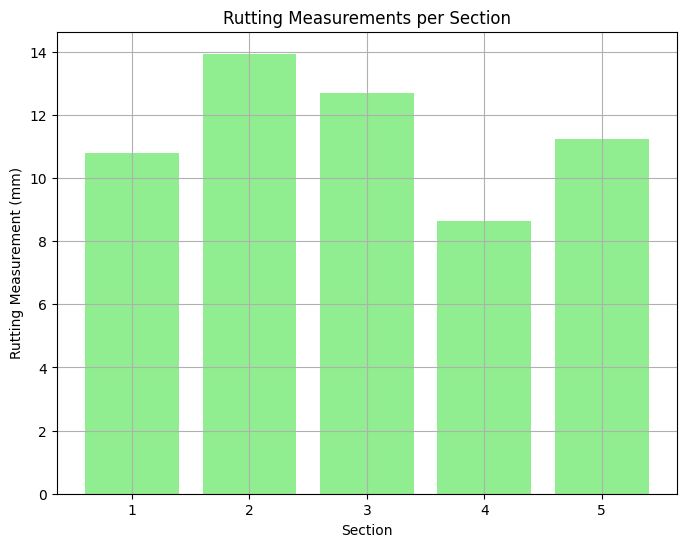

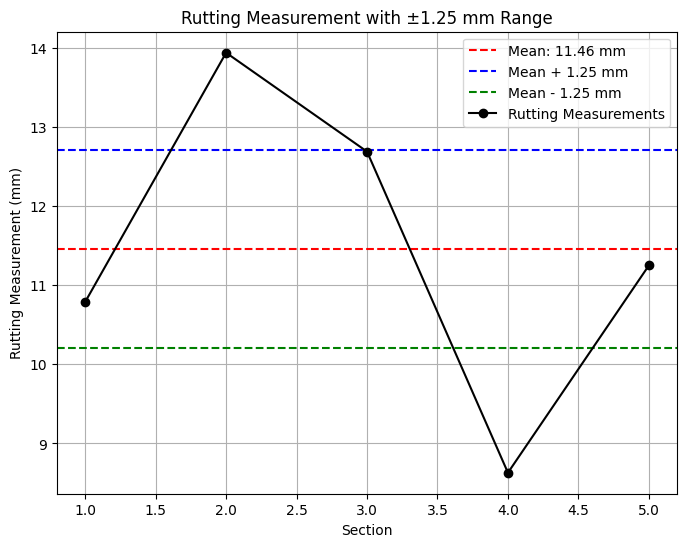

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Rutting data provided
sections = [1, 2, 3, 4, 5]
rutting_data = [10.79, 13.94, 12.69, 8.63, 11.25]

# Calculating the mean and standard deviation
mean_rutting = np.mean(rutting_data)
std_rutting = np.std(rutting_data, ddof=1)
acceptance_criterion = 1.25

# Print the key statistics
print(f"Mean Rutting Measurement: {mean_rutting:.2f} mm")
print(f"Standard Deviation of Rutting: {std_rutting:.2f} mm")

# Check if the standard deviation meets the agency's acceptance criterion
if std_rutting <= acceptance_criterion:
    print("The measurement method meets the precision acceptance criterion (Standard deviation ≤ 1.25 mm).")
else:
    print("The measurement method does NOT meet the precision acceptance criterion (Standard deviation > 1.25 mm).")

# 1. Bar plot of rutting measurements
plt.figure(figsize=(8, 6))
plt.bar(sections, rutting_data, color='lightgreen')
plt.xlabel('Section')
plt.ylabel('Rutting Measurement (mm)')
plt.title('Rutting Measurements per Section')
plt.grid(True)
plt.show()

# 2. Standard deviation plot with mean and ±1.25 mm range
plt.figure(figsize=(8, 6))
plt.axhline(mean_rutting, color='red', linestyle='--', label=f'Mean: {mean_rutting:.2f} mm')
plt.axhline(mean_rutting + acceptance_criterion, color='blue', linestyle='--', label=f'Mean + {acceptance_criterion} mm')
plt.axhline(mean_rutting - acceptance_criterion, color='green', linestyle='--', label=f'Mean - {acceptance_criterion} mm')
plt.plot(sections, rutting_data, marker='o', linestyle='-', color='black', label='Rutting Measurements')
plt.xlabel('Section')
plt.ylabel('Rutting Measurement (mm)')
plt.title('Rutting Measurement with ±1.25 mm Range')
plt.legend()
plt.grid(True)
plt.show()
